# Iterators and Generators

In this section of the course we will be learning the difference between iteration and generation in Python and how to construct our own **Generators with the yield** statement. Generators allow us to generate as we go along, instead of holding everything in memory. 

We've touched on this topic in the past when discussing certain built-in Python functions like **range()**, **map()** and **filter()**.

Let's explore a little deeper. We've learned how to create functions with <code>def</code> and the <code>return</code> statement. **Generator functions allow us to write a function that can send back a value and then later resume to pick up where it left off**. This type of function is a generator in Python, allowing us to generate a sequence of values over time. The main difference in syntax will be the use of a <code>yield</code> statement.

In most aspects, a generator function will appear very similar to a normal function. The main difference is when a generator function is compiled they become an object that supports an **iteration protocol**. That means when they are called in your code they don't actually return a value and then exit. Instead, generator functions **will automatically suspend** and **resume their execution at the state around the last point of value generation**. The main advantage here is that instead of having to compute an entire series of values up front, the generator computes one value and then suspends its activity awaiting the next instruction. This feature is known as **state suspension**.


￼￼To start getting a better understanding of generators, let's go ahead and see how we can create some.

In [4]:
# Generator function for the cube of numbers (power of 3)
def gencubes(n):
    for num in range(n): # up to but not including n
        yield num**3

In [3]:
for x in gencubes(3):
    print(x)

0
1
8


Great! Now since we have a generator function we don't have to keep track of every single cube we created.

Generators are best for calculating large sets of results (particularly in calculations that involve loops themselves) in cases where we don’t want to allocate the memory for all of the results at the same time.

## How does the code above work?

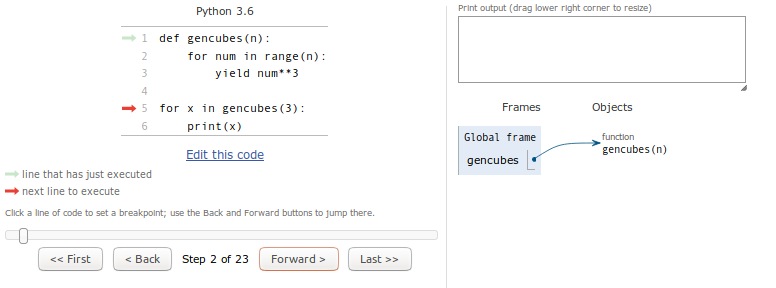

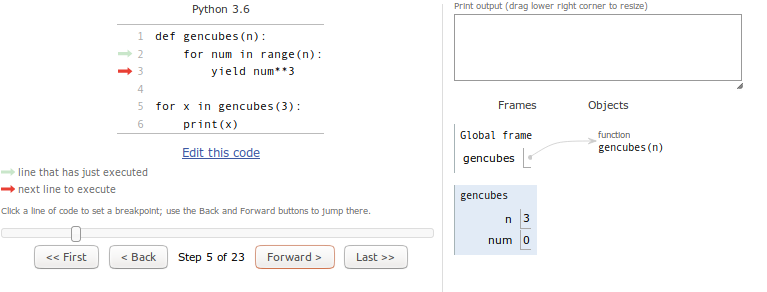

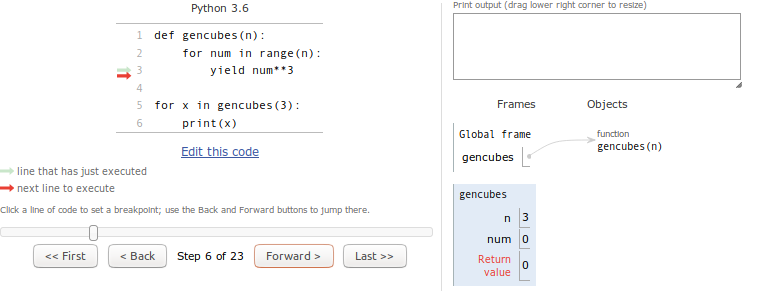

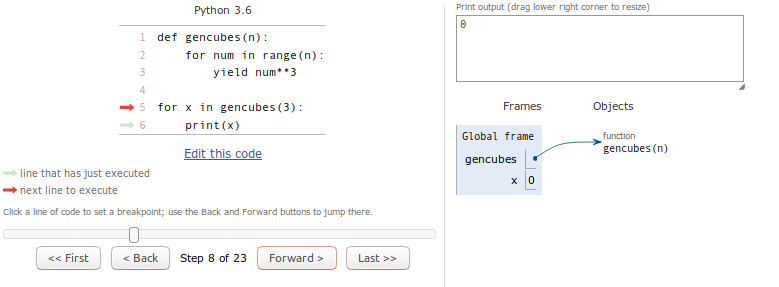

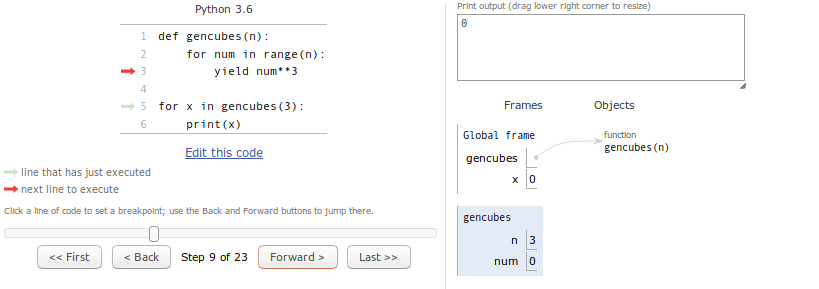

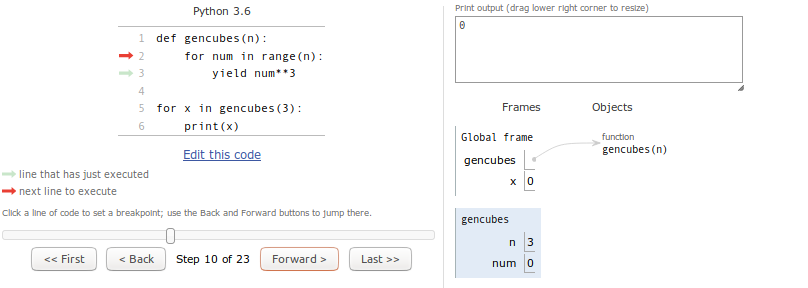

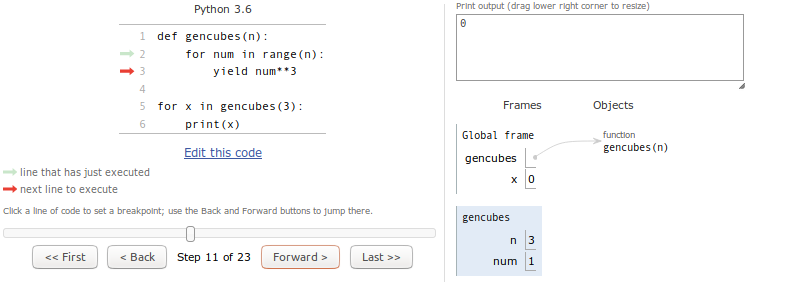

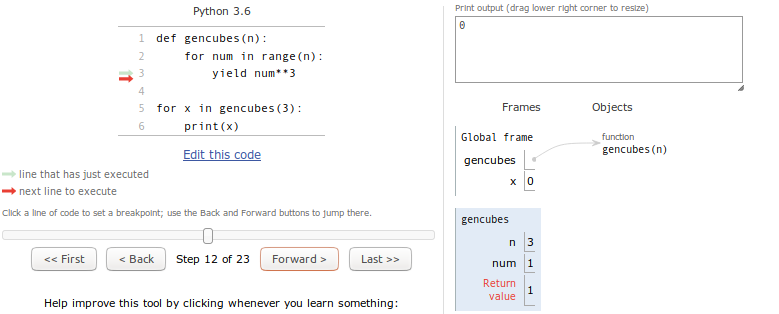

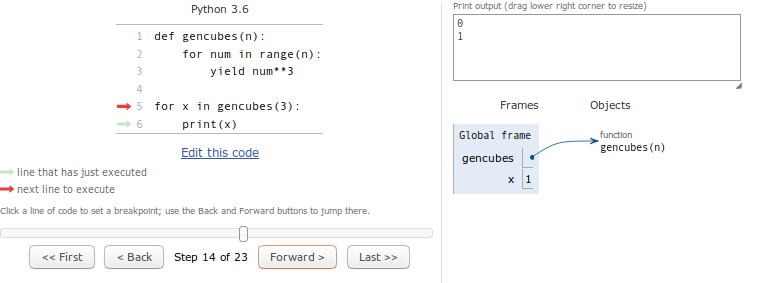

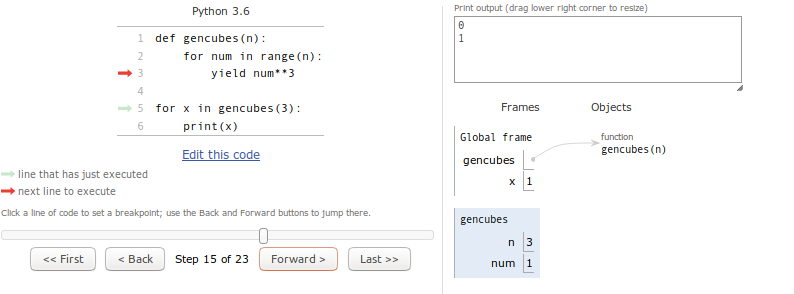

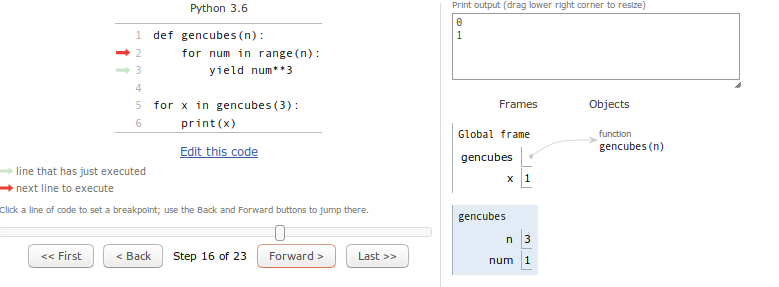

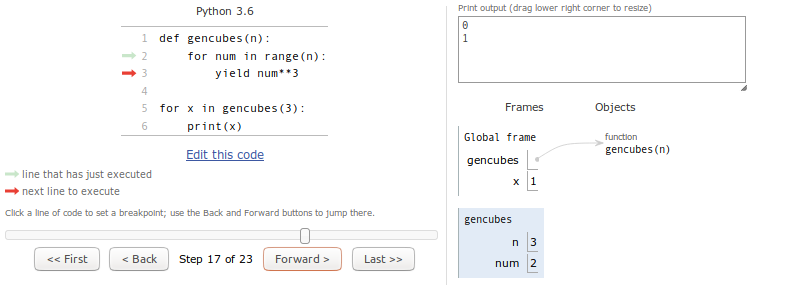

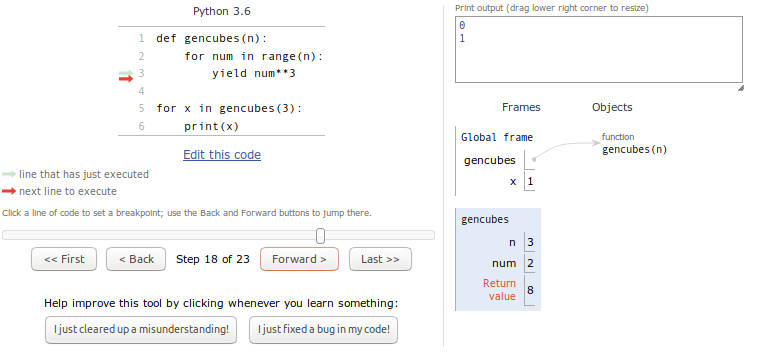

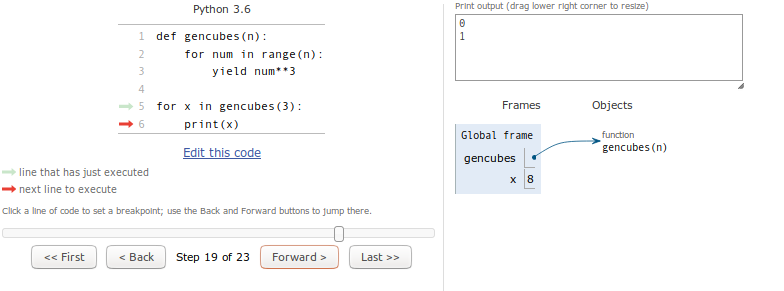

## Another example generator for Fibonacci series

Let's create another example generator which calculates [fibonacci](https://en.wikipedia.org/wiki/Fibonacci_number) numbers:

In [10]:
def genfibon(n):
    """
    Generate a fibonnaci sequence up to n
    """
    a = 1
    b = 1
    for i in range(n):
        yield a
        a,b = b,a+b

In [11]:
for num in genfibon(10):   # while True
    print(num)             #     try: num = next(genfibon(10))
                           #     except StopIteration:
                           #         break
                           #     else:
                           #        print(num)
                            
    

1
1
2
3
5
8
13
21
34
55


What if this was a normal function, what would it look like?

In [12]:
def fibon(n):
    a = 1
    b = 1
    output = []
    
    for i in range(n):
        output.append(a)
        a,b = b,a+b
        
    return output

In [13]:
fibon(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

Notice that if we call some huge value of n (like 100000) the second function will have to keep track of every single result, when in our case we actually only care about the previous result to generate the next one!

## next() and iter() built-in functions
A key to fully understanding generators is the next() function and the iter() function.

The next() function allows us to access the next element in a sequence. Lets check it out:

In [14]:
def simple_gen():
    for x in range(3):  # up to and including 2; 0, 1, 2
        yield x

In [15]:
# Assign simple_gen 
g = simple_gen()

In [16]:
print(next(g))

0


In [17]:
print(next(g))

1


In [18]:
print(next(g))

2


In [19]:
print(next(g))

StopIteration: 

After yielding all the values **next()** caused a **StopIteration** error. What this error informs us of is that all the values have been yielded. 

You might be wondering that why don’t we get this error while using a for loop? A for loop automatically catches this error and stops calling next() (refer to code in cell In[11])

Let's go ahead and check out how to use **iter()**. You remember that **strings are iterables**:

In [13]:
s = 'hello'

#Iterate over string
for let in s:
    print(let)

h
e
l
l
o


But that doesn't mean the string itself is an *iterator*! We can check this with the next() function:

In [14]:
next(s)

TypeError: 'str' object is not an iterator

Interesting, this means that a string object supports iteration, but we can not directly iterate over it as we could with a generator function. The iter() function allows us to do just that!

In [15]:
s_iter = iter(s)

In [16]:
next(s_iter)

'h'

In [17]:
next(s_iter)

'e'

## Lets write our own iterator instead of built-in iter() function

Refer to 11-Python Generators/My_iter_function

In [21]:


# implemented a built-in equivalent of iter() function
# behind the scenes, my_iter stores its own symbol table (i.e. its state via locals())
# and the line number where execution should be resumed. Next time the iterator is invoked
# execution starts from the line number along with the stored symbol table.
def my_iter(iterable):
    for item in iterable:
        yield item


if __name__ == '__main__':
    s = 'Hello'  # string is an iterable
    s_iter = my_iter(s)  # note that there is no "next(my_iter(s))" here, it just returns an iterator object
    print(s_iter)        # <generator object my_iter at 0x7f30b124d360>

    print('(1) For loop calling on iterator s_iter')
    # for loop implementation (1) and while loop implementation (2) are equivalent
    # (1) For loop calling on iterator s_iter
    for letter in s_iter:  # keep invoking s_iter iterator till it raises StopIteration
        print(letter)
    # once the for loop is over, s_iter iterator is in a state, where next(s_iter) would raise StopIteration
    # print(next(s_iter))  ## uncomment this line and see StopIteration error for yourself

    print("(2) While loop calling on next(s_iter)")
    # (2) While loop calling on next(s_iter)
    s_iter = my_iter(s)    # re-initialize s_iter with a brand new iterator object with its zeroed state
    print(s_iter)       # <generator object my_iter at 0x7fdb0ae03ba0>
    while True:
        try:
            letter = next(s_iter)
        except StopIteration:
            break
        else:
            print(letter)
    # print(next(s_iter))  ## uncomment this line and see StopIteration error for yourself

    print('Doing the above functionality with built-in iter() function')
    # Referring to above code, the usage of my_iter & for loop, lets use built-in iter() function instead
    s_iter = iter(s)
    print(s_iter)          #  <str_iterator object at 0x7f77075cd090>
    for letter in s_iter:
        print(letter)



<generator object my_iter at 0x7f771d5ecf50>
(1) For loop calling on iterator s_iter
H
e
l
l
o
(2) While loop calling on next(s_iter)
<generator object my_iter at 0x7f771d5ecdd0>
H
e
l
l
o
Doing the above functionality with built-in iter() function
H
e
l
l
o


Great! Now you know how to convert objects that are iterable into iterators themselves!

The main takeaway from this lecture is that using the yield keyword at a function will cause the function to become a generator. This change can save you a lot of memory for large use cases. For more information on generators check out:

[Stack Overflow Answer](http://stackoverflow.com/questions/1756096/understanding-generators-in-python)

[Another StackOverflow Answer](http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python)

## REFERENCES

[1] http://pythontutor.com/visualize.html#mode=edit